In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Data Analytics/Iris.csv')

In [ ]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.size

900

In [ ]:
iris.ndim

2

In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.drop('Id',axis=1,inplace=True)

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: >

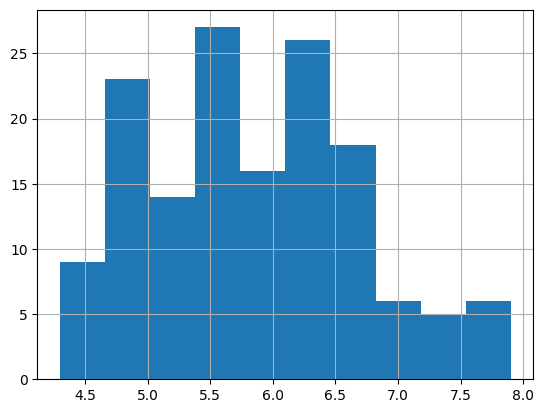

In [ ]:
iris['SepalLengthCm'].hist()

<Axes: >

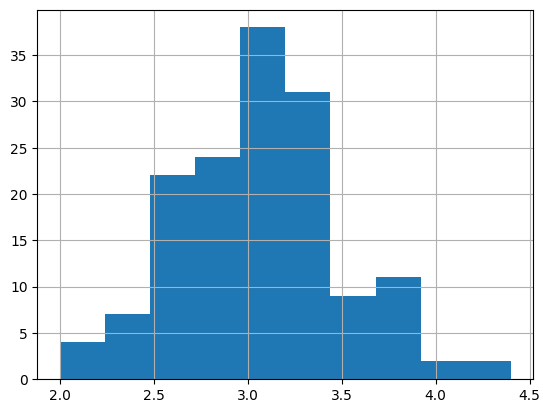

In [ ]:
iris['SepalWidthCm'].hist()

<Axes: >

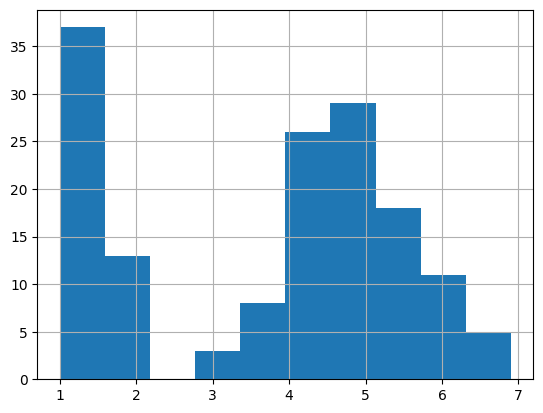

In [ ]:
iris['PetalLengthCm'].hist()

<Axes: >

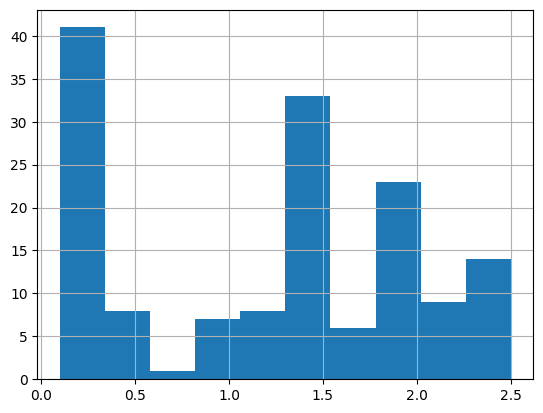

In [ ]:
iris['PetalWidthCm'].hist()

In [ ]:
Species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
color=['Red','Blue','Green']

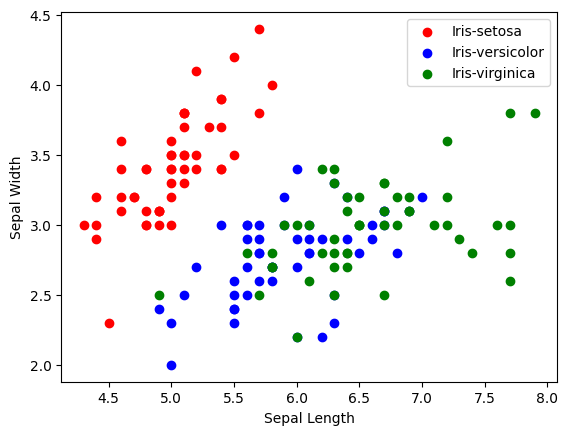

In [ ]:
for i in range(3):
  x=iris[iris['Species']==Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=color[i],label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()


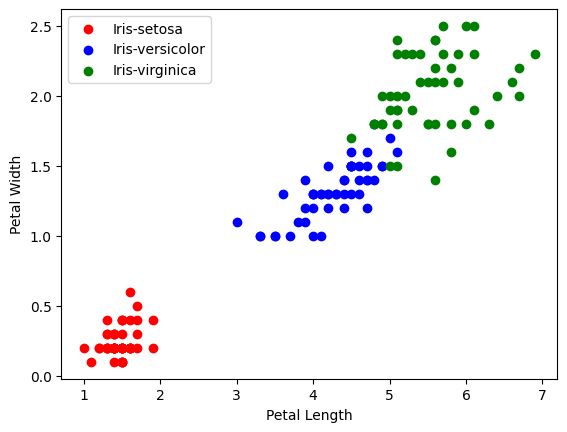

In [ ]:
for i in range(3):
  x=iris[iris['Species']==Species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=color[i],label=Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [ ]:
Matriz=iris.select_dtypes(include='number').corr()

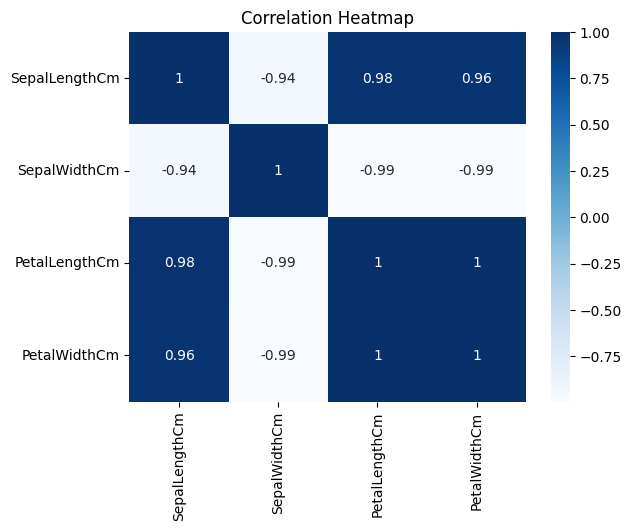

In [ ]:
sns.heatmap(Matriz.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
iris['Species']=iris['Species'].astype('category')
iris['Species']=iris['Species'].cat.codes

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int8)

In [ ]:
c=model.intercept_
c

array([  9.07176597,   1.81821925, -10.88998522])

In [ ]:
m=model.coef_
m

array([[-0.39634076,  0.9523916 , -2.37629048, -1.01351596],
       [ 0.51221741, -0.24809347, -0.21455322, -0.76203024],
       [-0.11587664, -0.70429814,  2.5908437 ,  1.7755462 ]])

In [ ]:
newdata=[[4.9,3.0,1.4,0.2]]

In [ ]:
predict_new=model.predict(newdata)
print("The Predicted Species" , predict_new)

The Predicted Species [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
model.score(x,y)*100

98.0